In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import warnings
warnings.filterwarnings("ignore") 

In [2]:
datasets = pd.read_csv('Social_Network_Ads .csv')
datasets

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
print("the data has",datasets.shape,"rows,columns in order")
print("Columns (features of the dataset)")
datasets.columns

the data has (400, 5) rows,columns in order
Columns (features of the dataset)


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
datasets.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [5]:
datasets.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
dummy_Gender = pd.get_dummies(datasets['Gender'])
dummy_Gender.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [7]:
datasets.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

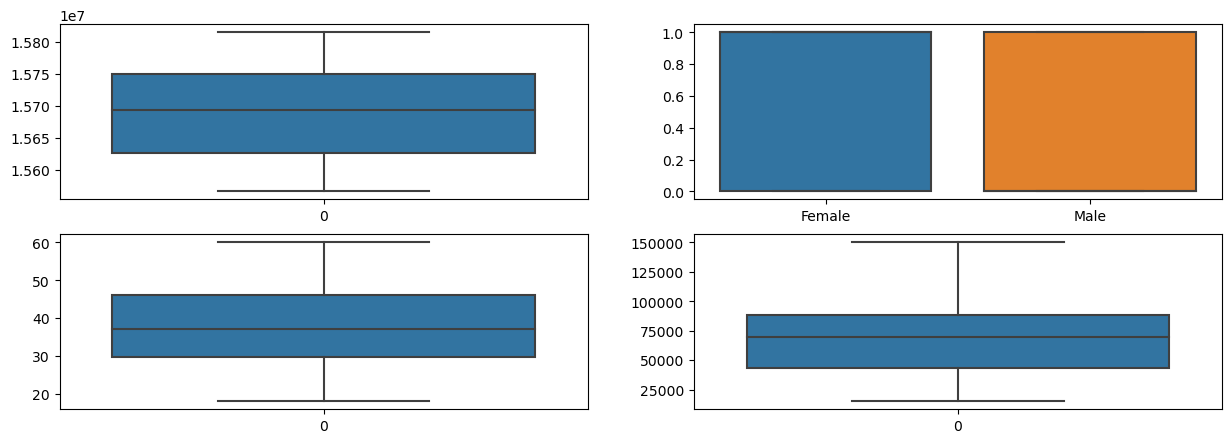

In [8]:
fig, axes = plt.subplots(2,2, figsize=(15,5))
sns.boxplot(datasets['User ID'], ax=axes[0,0])
sns.boxplot(dummy_Gender, ax=axes[0,1])
sns.boxplot(datasets['Age'], ax=axes[1,0])
sns.boxplot(datasets['EstimatedSalary'], ax=axes[1,1])
plt.show()

In [9]:
#no outliers so no need to do do any of the oultliers methods

<Axes: >

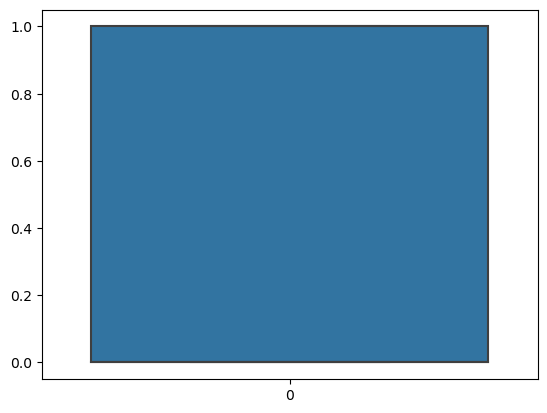

In [10]:
sns.boxplot(datasets['Purchased'])

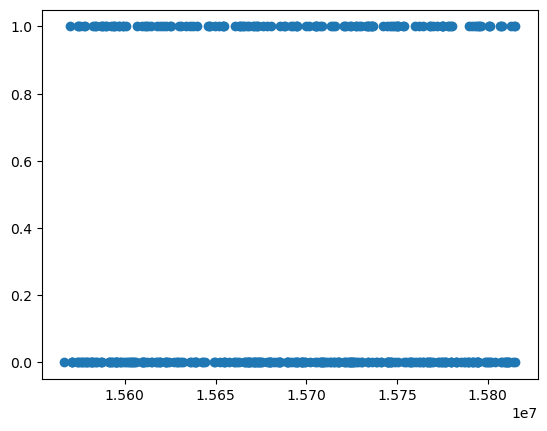

In [11]:
plt.scatter(datasets['User ID'],datasets['Purchased'])

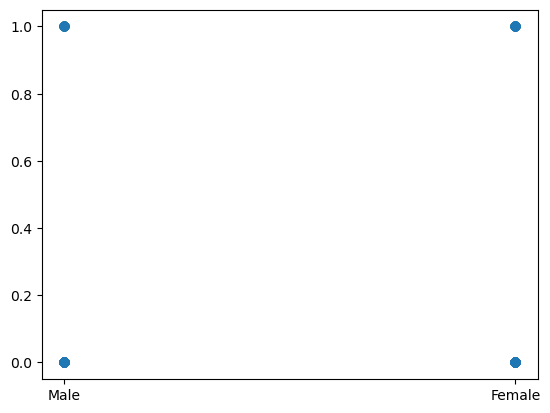

In [12]:
plt.scatter(datasets['Gender'],datasets['Purchased'])

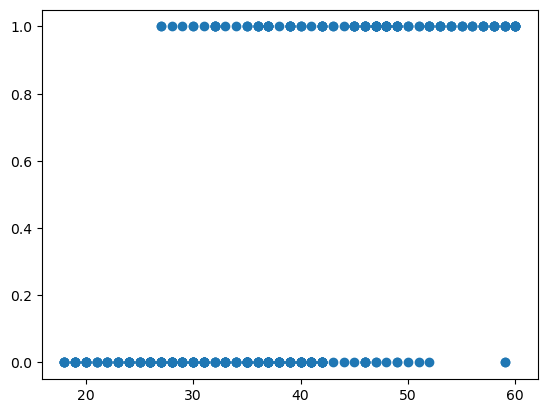

In [13]:
plt.scatter(datasets['Age'],datasets['Purchased'])

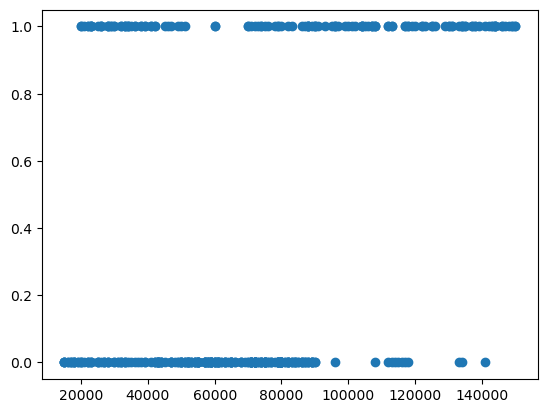

In [14]:
plt.scatter(datasets['EstimatedSalary'],datasets['Purchased'])

In [15]:
x = datasets.drop(["Purchased"],axis=1)
x=x.drop(["Gender"],axis=1)
y = datasets["Purchased"]

In [16]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [18]:
sc_x = StandardScaler()
x_Train = sc_x.fit_transform(x_Train)
x_Test = sc_x.transform(x_Test)
print(x_Train.shape)
print(x_Test.shape)

(300, 3)
(100, 3)


In [19]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_Train, y_Train)

LogisticRegression(random_state=0)

In [21]:
y_Pred = classifier.predict(x_Test)

In [23]:
cm = confusion_matrix(y_Test, y_Pred)
show = pd.DataFrame(cm,columns=["yes","no"],index=["yes","no"])
show.head()

,yes,no
yes,66,2
no,8,24


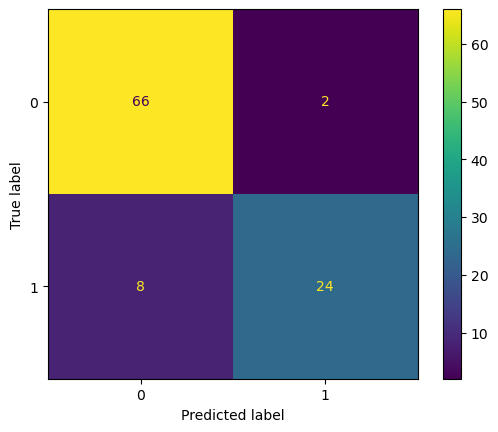

In [29]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.savefig('CM.png')

In [32]:
print(classification_report(y_Test, y_Pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



In [28]:
print("Accuracy=", accuracy_score(y_Test, y_Pred))
print("F1=", f1_score(y_Test, y_Pred))
print("Precision=", precision_score(y_Test, y_Pred))

Accuracy= 0.9
F1= 0.8275862068965517
Precision= 0.9230769230769231
